In [1]:
!nvidia-smi

Fri Jun 21 20:33:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import ultralytics
ultralytics.checks()


from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [8]:
%cd /content/drive/MyDrive/YOLO_V8

/content/drive/MyDrive/YOLO_V8


In [9]:
! yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 155MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [10]:
!ls runs/detect/train/

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1719005338.682bb11550d0.2972.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


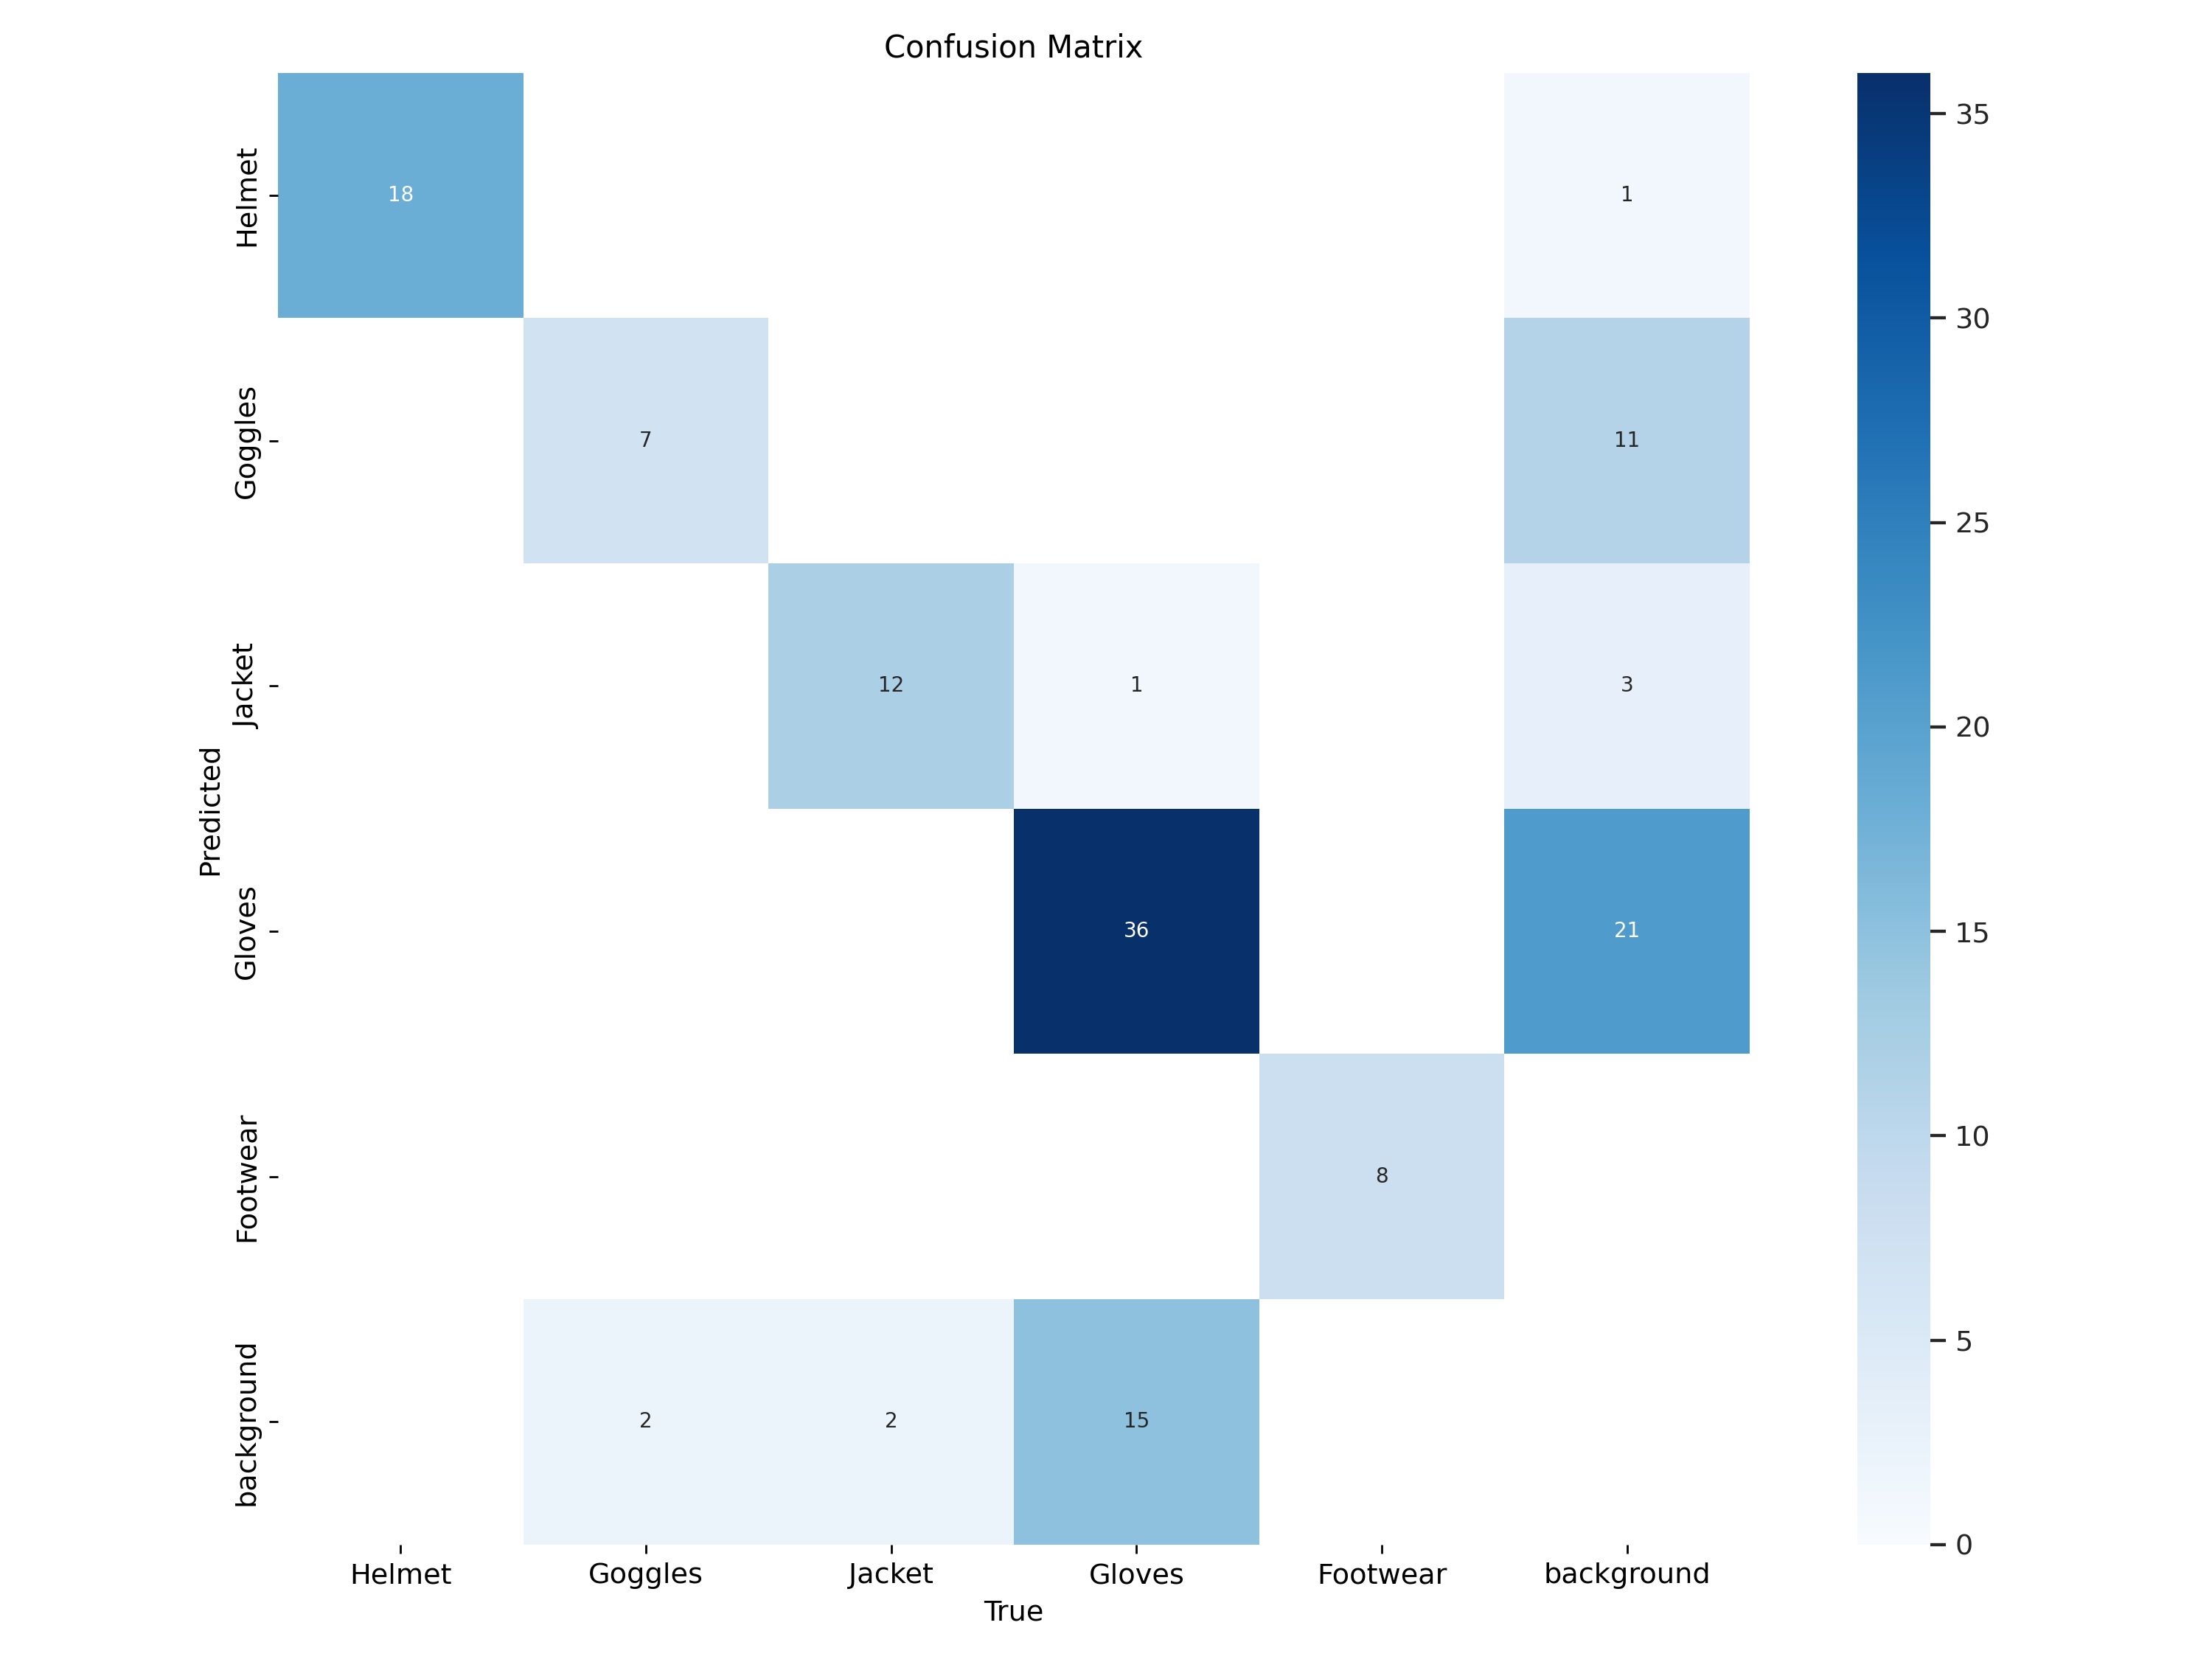

In [14]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

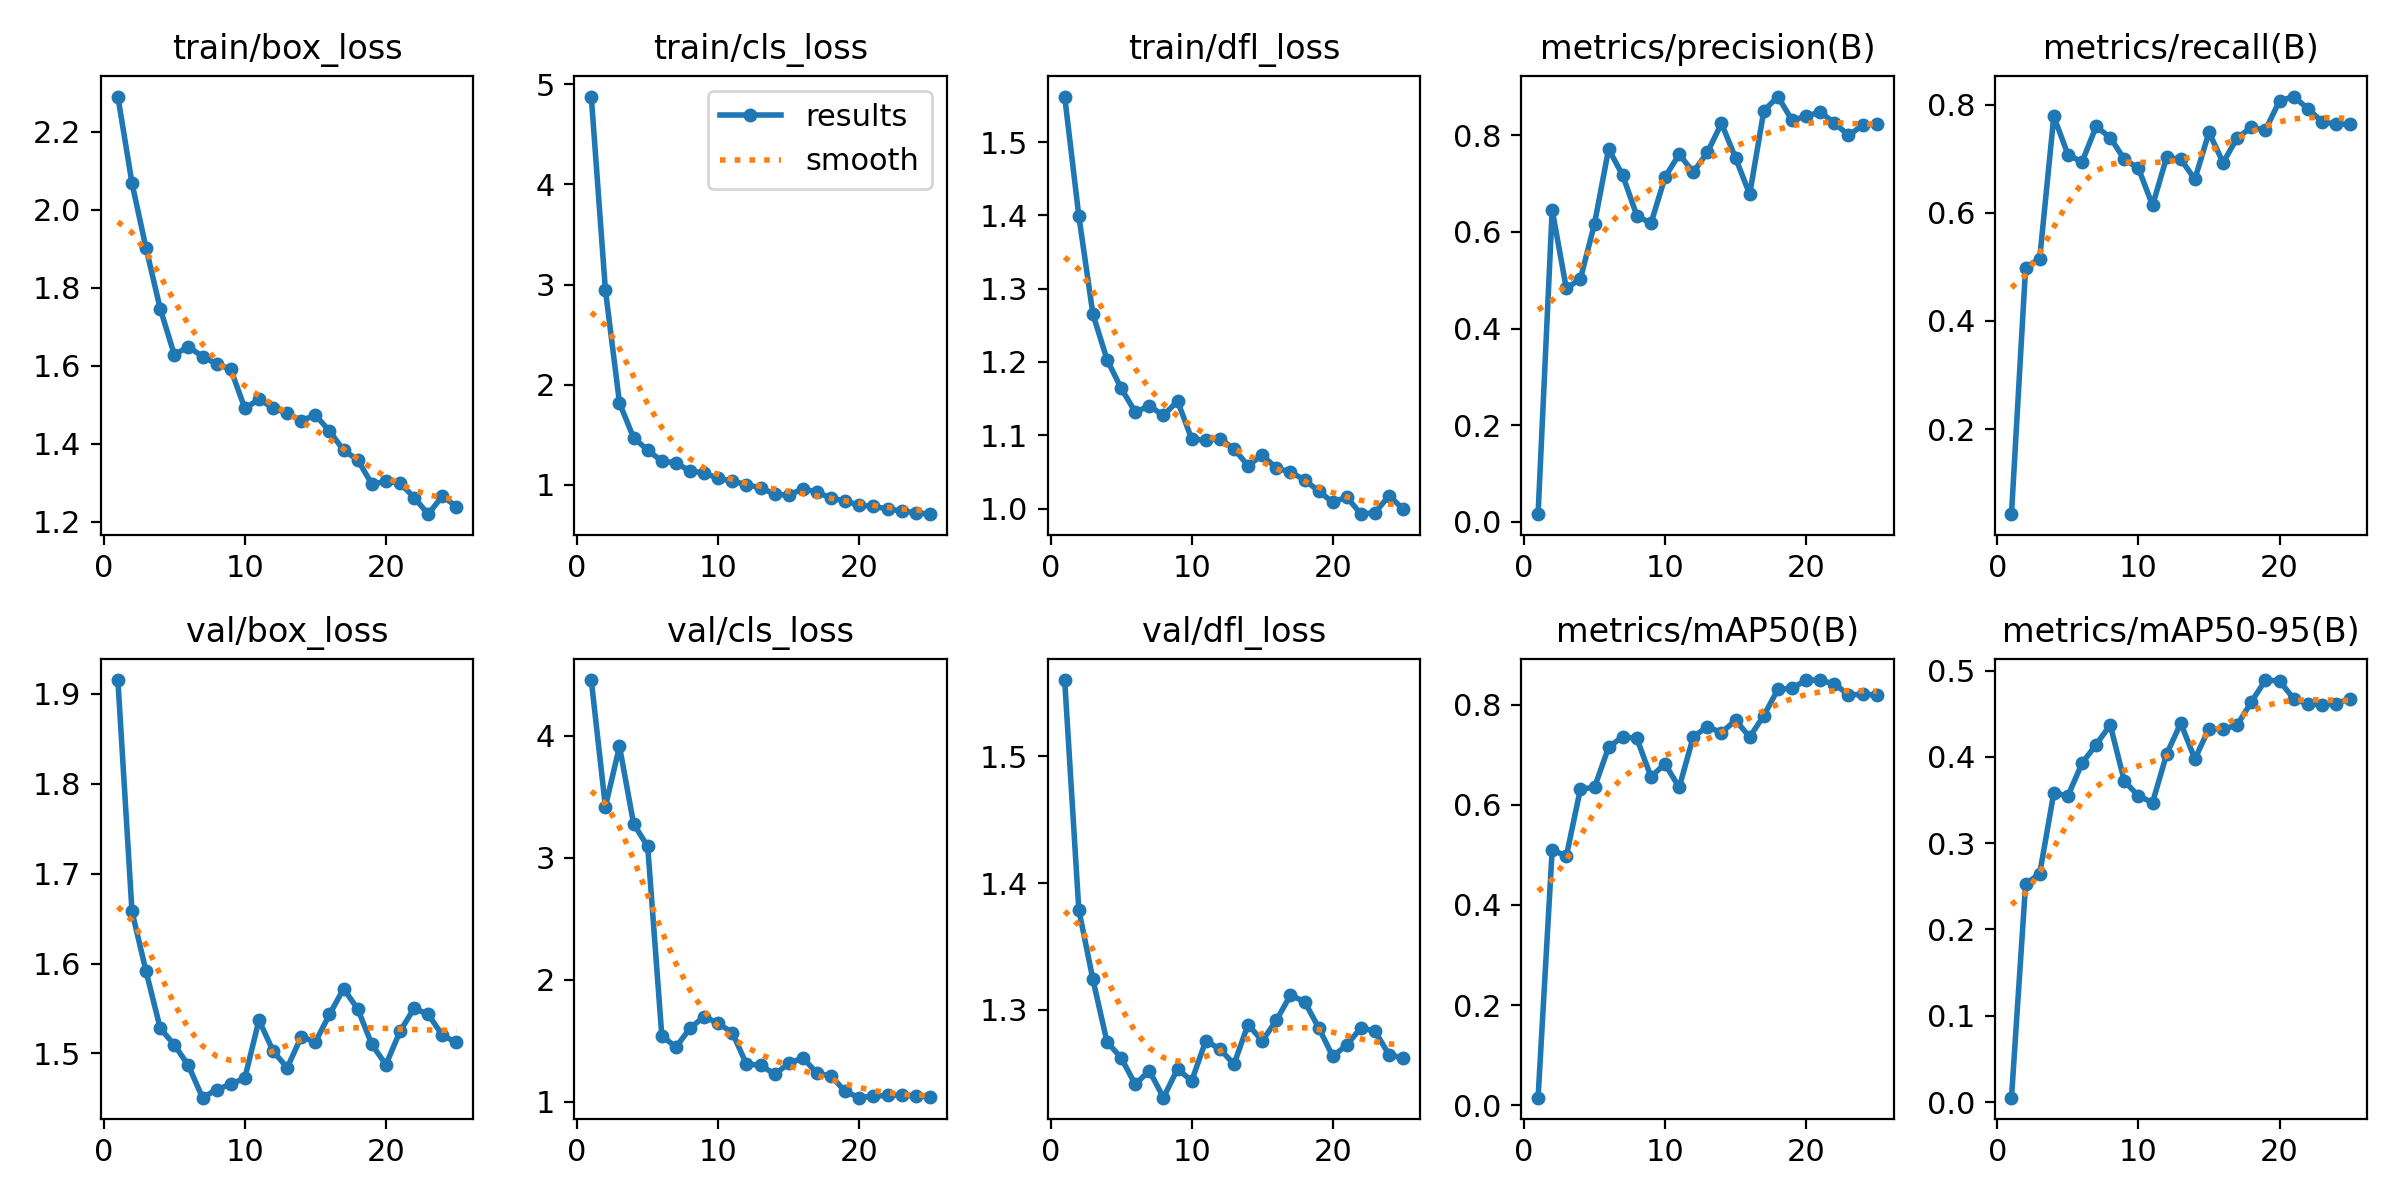

In [15]:
Image(filename='runs/detect/train/results.png', width=600)

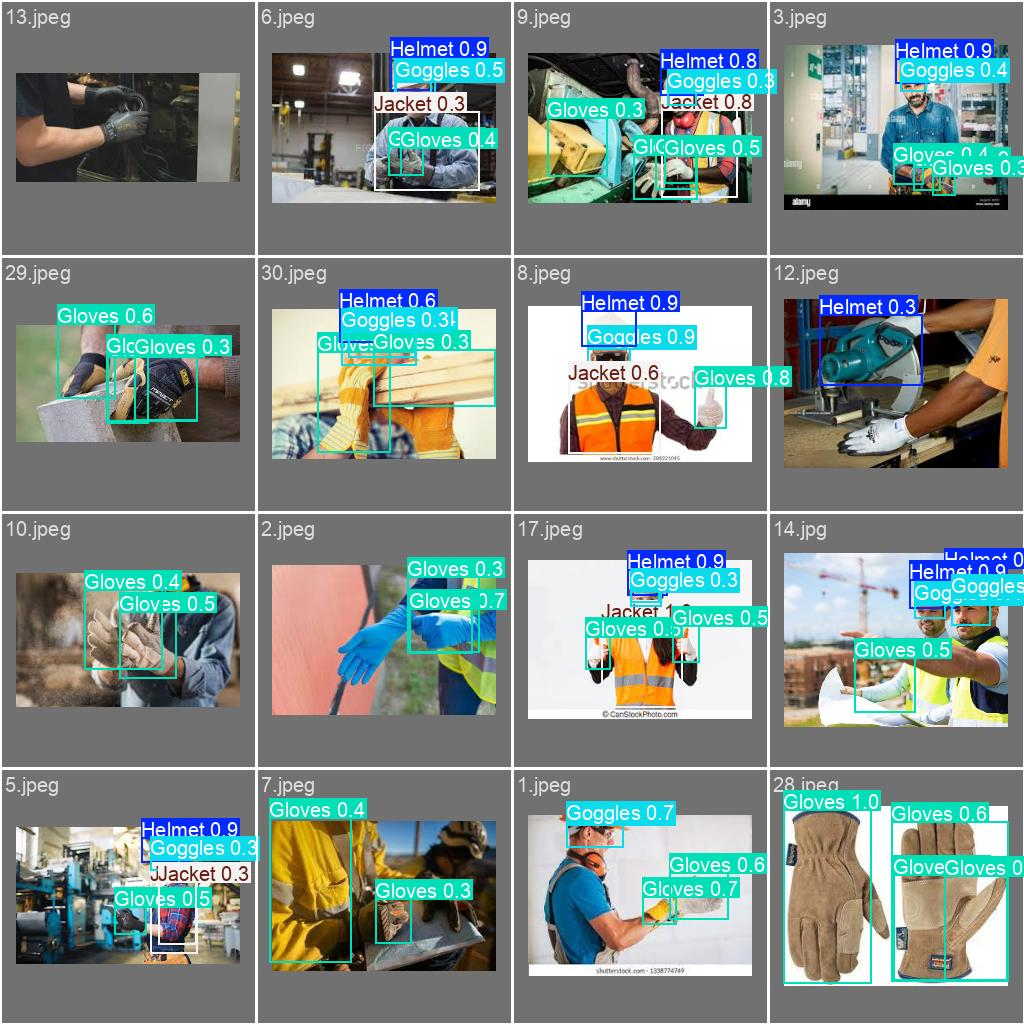

In [16]:

Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [18]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO_V8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.11s/it]
                   all         31        101      0.847      0.798      0.846       0.49
                Helmet         17         18      0.897          1      0.992      0.689
               Goggles          9          9      0.705      0.667      0.708      0.283
                Jacket         13         14      0.856      0.857      0.852      0.613
                Gloves         30         52      0.777      0.536      0.681      0.372
              Footwear          4          8          1       0.93      0.995      0.491
Speed: 0.2ms preprocess, 40.2ms infer

### Performance Metrics
 - Box(P): Precision of the bounding boxes.
 - R: Recall of the bounding boxes.
 - mAP50: Mean Average Precision at IoU threshold of 50%.
 - mAP50-95: Mean Average Precision averaged over IoU thresholds from 50% to 95%.



In [19]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLO_V8/data/test/images

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/YOLO_V8/data/test/images/1.jpeg: 192x224 1 Goggles, 2 Glovess, 129.9ms
image 2/31 /content/drive/MyDrive/YOLO_V8/data/test/images/10.jpeg: 160x224 2 Glovess, 164.2ms
image 3/31 /content/drive/MyDrive/YOLO_V8/data/test/images/11.jpeg: 224x224 4 Glovess, 14.2ms
image 4/31 /content/drive/MyDrive/YOLO_V8/data/test/images/12.jpeg: 192x224 (no detections), 9.6ms
image 5/31 /content/drive/MyDrive/YOLO_V8/data/test/images/13.jpeg: 128x224 (no detections), 87.2ms
image 6/31 /content/drive/MyDrive/YOLO_V8/data/test/images/14(1).jpeg: 224x224 1 Jacket, 9.2ms
image 7/31 /content/drive/MyDrive/YOLO_V8/data/test/images/14.jpg: 192x224 2 Helmets, 2 Goggless, 1 Gloves, 8.8ms
image 8/31 /content/drive/MyDrive/YOLO_V8/data/test/images/15.jpeg: 224x224 3 Glovess, 9.0ms
image 9/31 /content/drive/MyDrive/YO

### For More about Validation  : https://chatgpt.com/c/baab44d4-97c7-4aa8-adda-3b31db6dddff